<a href="https://colab.research.google.com/github/mkorob/NovelAnalysis/blob/max/GoneWithTheWind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gone With The Wind Character Analysis

Summary of what this notebook does to insert later.


## 0. Preliminaries

In [17]:
import requests
import pandas as pd
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## 1. Load Gone With The Wind Text from Gutenberg


In [4]:
# URL of "Gone with the Wind" on Project Gutenberg
url = "https://gutenberg.net.au/ebooks02/0200161.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the content of the book
    content = response.text

    # Remove Project Gutenberg's header and footer
    start_index = content.find("CHAPTER I")
    end_index = content.find("THE END")
    content = content[start_index:end_index]

    # Display the first 500 characters of the content
    print(content[:500])
else:
    print("Failed to retrieve the book from Project Gutenberg.")

CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm as the Tarleton twins were.  In her face were
too sharply blended the delicate features of her mother, a Coast
aristocrat of French descent, and the heavy ones of her florid
Irish father.  But it was an arresting face, pointed of chin,
square of jaw.  Her eyes were pale green without a touch of hazel,
starred with bristly black lashes and slightly tilted at the ends.
Above them, her thick black bro


In [5]:
#check the start and the end of the novel
print(f"The Start of the GTTW : {content[:100]}")
print(f"The End of the GTTW : {content[-100:]}")

The Start of the GTTW : CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm a
The End of the GTTW : it then.
Tomorrow, I'll think of some way to get him back.  After all,
tomorrow is another day."






## 2. Extract Main Characters

To analyze interactions, we need to map the named entities in the text to the names of the main characters. Here, we make a list of all characters in the novel the way they are referred to in a novel and map them to a unique list of characters in the novel. (e.g. "Catherine", "Cathy", -> "Catherine").

In [39]:
import spacy

In [40]:
def extract_characters(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)

    return sorted(named_entities)

In [42]:
len(content)

2340566

In [43]:
#Spacy NER's extractor needs shorter texts so we split in thirds
thir_content = int(len(content)/3)
characters1 = extract_characters(content[:thir_content])
characters2 = extract_characters(content[thir_content:(thir_content*2)])
characters3 = extract_characters(content[(thir_content*2):])

In [57]:
characters = set(characters1) | set(characters2) | set(characters3)

In [58]:
characters = [c for c in list(characters) if c[0].isupper()]

In [59]:
characters

["Angus MacIntosh's",
 'Shut',
 'Marthasville',
 'Tommy\nWellburn',
 'Cathleen Calvert Hilton',
 'Poke',
 "Scarlett O'Hara Hamilton",
 'John B. Gordon',
 'Miz\nWilkes',
 'Pittypat Hamilton',
 'Susan B.\nAnthony',
 'Grandfather\nRobillard',
 "Tommy Wellburn's",
 'Thet',
 'Brenton',
 'Aunt\nPitty',
 'Rene Picard',
 'Sloan',
 'Grandpa Merriwether',
 'Coward',
 'Jesus',
 'Wash',
 'Miss\nMelly',
 'Sheridan',
 'Raiford Calvert',
 'Scarlert',
 'Jeff\nDavis',
 'Pharisees',
 "Darcy\nisn't--",
 'Nevaire',
 'Antaeus',
 'Brian Boru',
 'Carey\nAshburn',
 'Ole Talbot',
 'Doan',
 'Jesus the Savior',
 'Believing',
 'Andrew',
 'Rhett Ah',
 'Young Miss',
 'Catching',
 'Longer',
 "Abel Wynder's",
 'McDonough',
 'Sullivan',
 'Ah et\n',
 'Henry Hamilton',
 'Levi',
 'Whar',
 "Tara fer de\nlonges'",
 "Ah wuz tellin'",
 'Whist',
 "Scarlett O'Hara's",
 'Emmie\nSlattery',
 'Caroline Irene',
 'Aunt',
 'Wade Hampton',
 'Rhett Butler',
 'Conningtons',
 'William Walker',
 'Joe',
 'Belle',
 'George Ashley Wilkes',
 

In [52]:
len(characters)

778

In [53]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(characters).to_csv("possible_characters.csv")

In [55]:
#import the completed list
characters = pd.read_csv("main_characters.csv")

In [56]:
#this is old output, the new one should have two columns, one for name as in book, the second for the "real name"
characters

,Unnamed: 0,0
0,0,Angus MacIntosh's
1,1,Shut
2,2,Marthasville
3,3,Tommy\nWellburn
4,4,Cathleen Calvert Hilton
...,...,...
773,773,Madam
774,774,Burdens
775,775,Daughter
776,776,Yellow


In [65]:
characters['real_character'] = characters['characters']

In [ ]:
len(characters)

84

## 3. Split Text into Narrative and Dialogue

In [9]:
def split_text(text):

    sections = []

    inside_quote = False
    start_index = 0
    end_index = 0
    current_quote_type = "Narrative"
    count_quotations =0

    for i, char in enumerate(text):
        if char == '"' and count_quotations == 0:
            if not inside_quote and text[i+1].isupper():
                #append existing text
                sections.append({ 'text': text[start_index:i].strip(), 'type': "Narrative"})
                #start end
                inside_quote = True
                start_index = i
                current_quote_type = 'Dialogue'
                count_quotations = 1
        elif char == '"' and count_quotations == 1:
            if inside_quote:
                inside_quote = False
                end_index = i
                #append existing text
                sections.append({ 'text': text[start_index:end_index+1].strip(), 'type': "Dialogue"})
                start_index = i +1
                count_quotations = 0
    return sections

In [11]:
#split text into sections
def split_text_into_sections(text):
    sections = []

    for line in text.split('\r\n\r\n'):
        line = line.strip()
        if line:
          if '"' in line:
            sections = sections + split_text(line)
          else:
            sections.append({'text': line, 'type': 'Narrative'})

    df = pd.DataFrame(sections)
    return df

In [12]:
result_df = split_text_into_sections(content)
#filter out empty sections (paragraphs spaces)
result_df = result_df.loc[result_df['text'] != "", ]

In [13]:
result_df

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
...,...,...
13005,"""I won't think of it now,""",Dialogue
13006,"she said again, aloud, trying to push\nher mis...",Narrative
13007,"""I'll--why, I'll go home to Tara\ntomorrow,""",Dialogue
13008,and her spirits lifted faintly.\n\nShe had gon...,Narrative


In [ ]:
#export df to check for any issues
result_df.to_csv("content_df.csv")

In [14]:
result_df.head(n = 50)

,text,type
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative
1,"""I know you two don't care about being expelle...",Dialogue
2,she said.,Narrative
3,"""But what about Boyd? He's kind of set on get...",Dialogue
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue
6,answered Brent carelessly.,Narrative
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue
9,"""Why?""",Dialogue
11,"""The war, goose! The war's going to start any...",Dialogue
13,"""You know there isn't going to be any war,""",Dialogue


##4. Match Entities between Dialogue Sections

In [ ]:
def match_entities(text, text_type, characters):
    if text_type == "Narrative":
        ent_out = []
        for index, row in characters.iterrows():
            entity = row['characters']
            matches = re.finditer(re.escape(entity), text)
            for match in matches:
                ent_out.append((match.start(), match.end(), row['real_character']))
        ent_out.sort(key=lambda x: x[0])
        return [entity[2] for entity in ent_out]
    else:
        return None


result_df['Entities'] = result_df.apply(lambda row: match_entities(row['text'], row['type'], characters), axis=1)

In [20]:
result_df.head(n=50)

,text,type,Entities
0,CHAPTER I\n\n\nScarlett O'Hara was not beautif...,Narrative,[]
1,"""I know you two don't care about being expelle...",Dialogue,None
2,she said.,Narrative,[]
3,"""But what about Boyd? He's kind of set on get...",Dialogue,None
5,"""Oh, he can read law in Judge Parmalee's offic...",Dialogue,None
6,answered Brent carelessly.,Narrative,[]
7,"""Besides, it don't\nmatter much. We'd have ha...",Dialogue,None
9,"""Why?""",Dialogue,None
11,"""The war, goose! The war's going to start any...",Dialogue,None
13,"""You know there isn't going to be any war,""",Dialogue,None


In [ ]:
convo_df =  pd.DataFrame(data = {
        'Character1': [],
        'Character2': [],
        'StartIndex': [],
        'EndIndex': [],
        'text_out': []
    })

convo_characters = []
convo_start = None
convo_end = None
text_out = ""
for idx, row in result_df.iterrows():
  if row['type'] == "Dialogue":
    convo_end = idx
    text_out += row['text']
    if convo_start is None:
      convo_start = idx

  else:
    if row['type'] == "Narrative":
      for entity in row['Entities']:
        if entity not in convo_characters and convo_characters is not None:
            convo_characters.append(entity)
        if len(convo_characters) > 2:
            new_row = {'Character1': convo_characters[0], 'Character2': convo_characters[1], 'StartIndex': convo_start, 'EndIndex': convo_end, 'text_out': text_out}
            convo_df = convo_df.append(new_row, ignore_index=True)
            convo_characters = [convo_characters[-1]]
            convo_start = None
            text_out = ""

<ipython-input-59-c17d32564cd0>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  convo_df = convo_df.append(new_row, ignore_index=True)
<ipython-input-59-c17d32564cd0>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  convo_df = convo_df.append(new_row, ignore_index=True)
<ipython-input-59-c17d32564cd0>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  convo_df = convo_df.append(new_row, ignore_index=True)
<ipython-input-59-c17d32564cd0>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  convo_df = convo_df.append(new_row, ignore_index=True)
<ipython-input-59-c17d32564cd0>:27: FutureWarning: The frame.append method is deprecated and wil

In [ ]:
convo_df = convo_df.dropna()

In [ ]:
def merge_characters(char1, char2):
  list_out = sorted([char1, char2])
  return str(list_out)

In [ ]:
convo_df['characters'] = convo_df.apply(lambda row: merge_characters(row['Character1'], row['Character2']), axis=1)

In [ ]:
convo_df['character_count'] = convo_df['text_out'].apply(len)

In [ ]:
convo_df

,Character1,Character2,StartIndex,EndIndex,text_out,characters,character_count
0,Charles,Scarlett,1.0,119.0,"""I know you two don't care about being expelle...","['Charles', 'Scarlett']",6736
1,Ashley,Scarlett,121.0,661.0,"""Jeems!""""Look,""""Don't it look to you like she ...","['Ashley', 'Scarlett']",28892
2,Charles,Scarlett,663.0,679.0,"""No, Carreen, next year, dear. Then you can s...","['Charles', 'Scarlett']",838
3,Ashley,Scarlett,681.0,719.0,"""Why, Ashley hasn't an idea that I'm in love w...","['Ashley', 'Scarlett']",1323
5,Scarlett,Ashley,721,983.0,"""I won't think of that now,""""If I think of it\...","['Ashley', 'Scarlett']",15912
...,...,...,...,...,...,...,...
402,Rhett,Ashley,12753,12789.0,"""Be kind to him.""""Oh,""""Ashley's not the only s...","['Ashley', 'Rhett']",1462
403,Scarlett,Rhett,12791,12885.0,"""So she's dead. That makes it nice for you, d...","['Rhett', 'Scarlett']",3383
404,Ashley,Rhett,12887,12897.0,"""But love can't wear out!""""Yours for Ashley di...","['Ashley', 'Rhett']",1702
405,Scarlett,Ashley,12899,12919.0,"""It was so obvious that we were meant for each...","['Ashley', 'Scarlett']",2828


In [ ]:
convo_df.groupby(['characters']).agg({'character_count': 'sum'}).sort_values(by='character_count', ascending=False)

,character_count
characters,
"['Ashley', 'Scarlett']",269044
"['Rhett', 'Scarlett']",234051
"['Frank', 'Scarlett']",61010
"['Ashley', 'Rhett']",55055
"['Charles', 'Scarlett']",37741
"['Frank', 'Rhett']",10910
"['Ashley', 'Frank']",7627
"['Ashley', 'Charles']",3823
"['Charles', 'Rhett']",3241


## 5. Pre-process Text for Regressions and LDA


### 5.1 Clean text from stopwords and other irrelevant words

### 5.2 Vectorize text

In [ ]:
X_tfidf = vectorizer.fit_transform(convo_df['text_out'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, convo_df.characters, test_size=0.2, random_state=42)

##6. Inspect Variables for Correlations


##7. Logistic Regression


In [ ]:
# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

In [ ]:
!pip install eli5
import eli5
eli5.show_weights(logreg, feature_names = vectorizer.get_feature_names_out())

## 8. Network Analysis (to delete?)


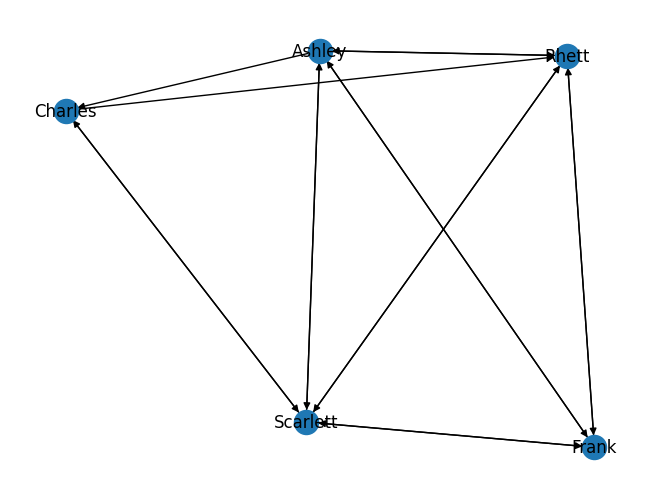

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(convo_df, 'Character1', 'Character2', edge_attr='character_count', create_using=nx.DiGraph())

# Draw the graph (optional)
nx.draw(G, with_labels=True)

In [ ]:
# Calculate edge centrality (you can use other metrics as well)
edge_centrality = nx.edge_betweenness_centrality(G)

# Sort edges based on centrality or weight (replace 'weight' with your desired metric)
sorted_edges = sorted(edge_centrality.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame to display top relationships
top_relationships_df = pd.DataFrame(sorted_edges, columns=['Edge', 'Centrality'])

print(top_relationships_df.head(n= 100))

                   Edge  Centrality
0   (Charles, Scarlett)       0.100
1      (Charles, Rhett)       0.100
2   (Scarlett, Charles)       0.100
3     (Ashley, Charles)       0.100
4       (Rhett, Ashley)       0.100
5    (Scarlett, Ashley)       0.075
6     (Scarlett, Frank)       0.075
7     (Rhett, Scarlett)       0.075
8        (Rhett, Frank)       0.075
9     (Frank, Scarlett)       0.075
10      (Frank, Ashley)       0.075
11    (Scarlett, Rhett)       0.050
12   (Ashley, Scarlett)       0.050
13      (Ashley, Rhett)       0.050
14      (Ashley, Frank)       0.050
15       (Frank, Rhett)       0.050


## 9. LDA

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assume 'df' is your DataFrame containing text data and class labels

# Preprocess the text (e.g., remove stopwords, tokenize)
# Define preprocessing functions as needed

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=1000, stop_words = "english", ngram_range=(2, 4))  # Adjust parameters as needed
X_tfidf = vectorizer.fit_transform(cath_heathcliff_df['text_out'])

# Perform topic modeling (LDA)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust number of topics
lda_model.fit(X_tfidf)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
num_words = 10

In [ ]:
for topic_id, topic_words in enumerate(lda_model.components_):
    top_word_indices = topic_words.argsort()[:-num_words - 1:-1]
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_word_indices]
    print(f"Topic {topic_id + 1}:")
    print(", ".join(top_words))
    print()

Topic 1:
ll make, think things, captain butler, didn know, ve gotten, don want, oh damn, oh right, ll think, rough ready

Topic 2:
miss hara, dr meade, god knows, oh hush, hara tell, don know, look like, know love, wouldn believe, ll sit

Topic 3:
miss scarlett, miss melly, mrs wilkes, mr kennedy, don know, captain butler, miss pitty, ah ain, ve got, mr wilkes

Topic 4:
ve got, mrs elsing, rhett butler, oh scarlett, oh rhett, don know, thing world, think ll, look face, general lee

Topic 5:
captain butler, mrs wilkes, don want, ve got, mr wilkes, ve come, old guard, old days, uncle rhett, oh darling

